In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
df=pd.read_csv("https://vbfilestorage.blob.core.windows.net/datasets/Telco-Customer-Churn.csv")

In [94]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
temp = df['TotalCharges'].unique()

In [27]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: xlabel='Churn', ylabel='count'>

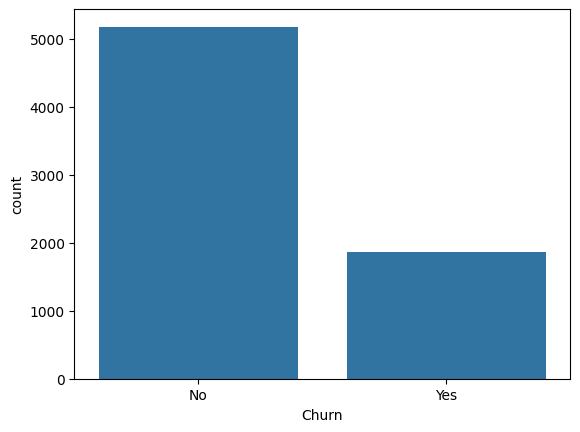

In [38]:
sns.countplot(x=df['Churn'])

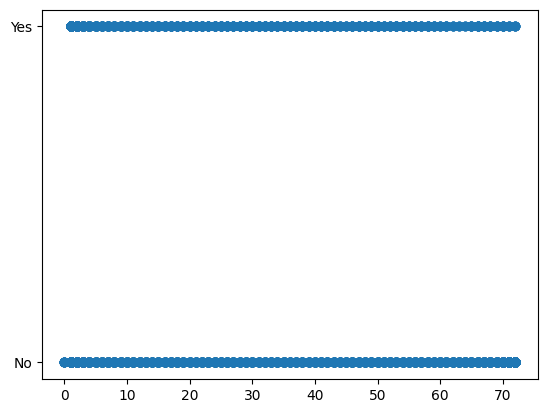

In [34]:
plt.scatter(df['tenure'],df['Churn'])

Text(0.5, 1.0, 'Before Standardization')

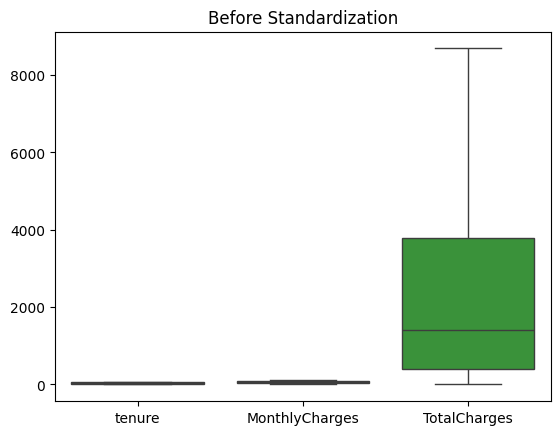

In [95]:
sns.boxplot(df[['tenure','MonthlyCharges','TotalCharges']])
plt.title('Before Standardization')

In [48]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


<Axes: xlabel='Churn', ylabel='count'>

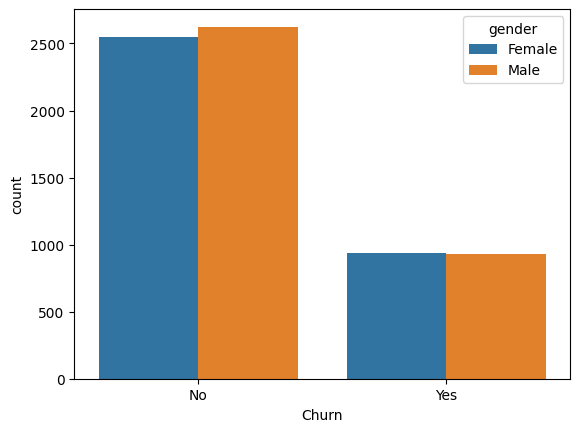

In [52]:
sns.countplot(x=df['Churn'],data=df, hue='gender')

In [56]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn'>

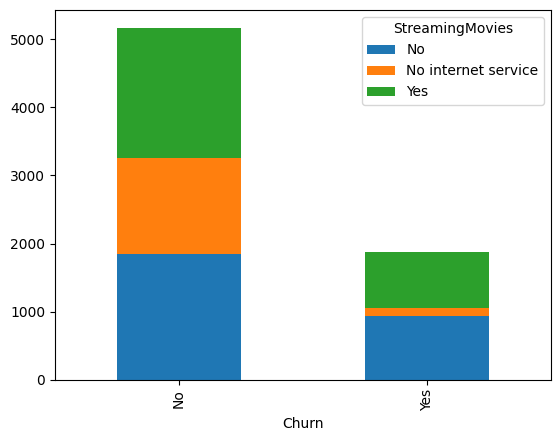

In [64]:
df_new = df[['Churn','StreamingMovies']]
df_new.groupby(['Churn','StreamingMovies']).size().unstack().plot(kind='bar',stacked=True)

<Axes: xlabel='Churn', ylabel='count'>

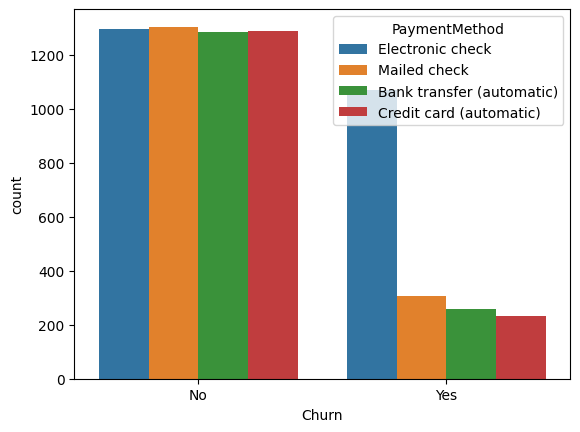

In [80]:
sns.countplot(x=df['Churn'],data=df, hue='PaymentMethod')

**Tenure and Churn**

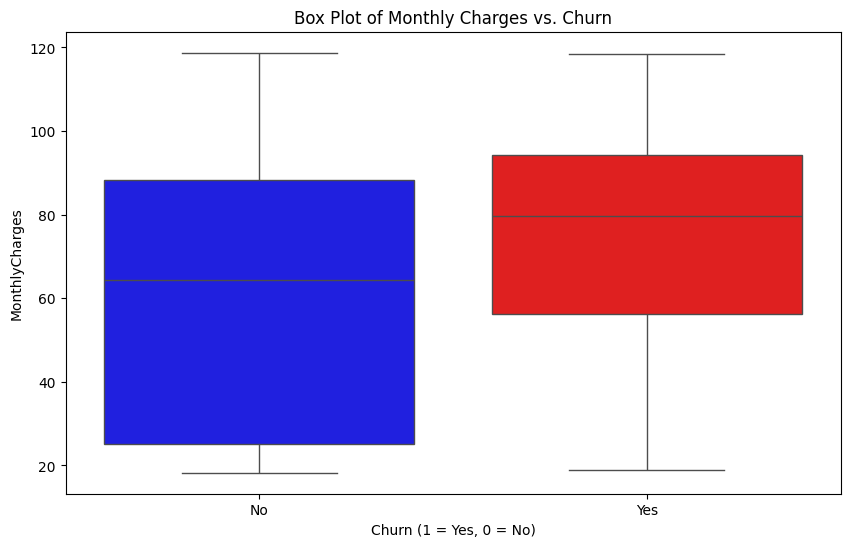

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MonthlyCharges','Churn']], x='Churn', y='MonthlyCharges', hue='Churn', palette={'No': 'blue', 'Yes': 'red'})
plt.title('Box Plot of Monthly Charges vs. Churn')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('MonthlyCharges')
plt.show()

In [93]:
data = df[['Churn','tenure','MonthlyCharges']]

data[['tenure','MonthlyCharges']].corr()

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


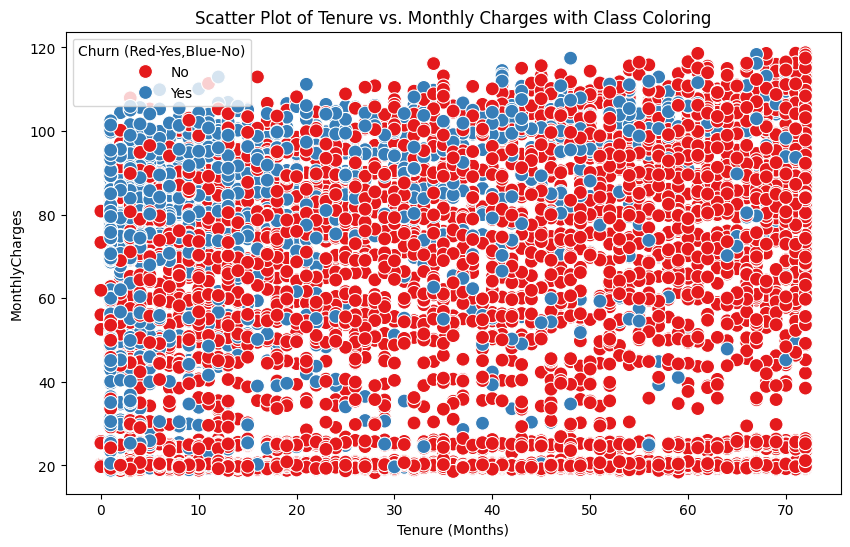

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='Churn', palette='Set1', s=100)
plt.title('Scatter Plot of Tenure vs. Monthly Charges with Class Coloring')
plt.xlabel('Tenure (Months)')
plt.ylabel('MonthlyCharges')
plt.legend(title='Churn (Red-Yes,Blue-No)')
plt.show()